# Data exploration with pandas and sklearn

## The goal of this homework is to discover structure in an unlabeled dataset. The observations in this dataset belong to several different clusters. The specific goal is to identify how many clusters there are and to which cluster each point belongs.

## Question 1 (5 points). Load the dataset into a pandas dataframe. Each row represents a single observation; the values in the columns are numeric features recorded for that observation (in other words, this is a 'tidy' dataset). How many rows and columns are there? What is the dimension of this dataset? In other words, how many different features are there for each observation?

In [15]:
# Below code was provided in the homework

%matplotlib inline
# to make sure plots show up in this notebook
import matplotlib.pyplot as plt # for plotting
import pandas as pd # pandas

datafile = 'data/dataset.csv' # load datafile

df = pd.read_csv(datafile) # assign to dataframe

# Below code was written by me

print(f'This dataset has {df.shape[0]} rows and {df.shape[1]} columns. This means that each of the {df.shape[0]} observations has {df.shape[1]} features associated with it.')


This dataset has 496 rows and 10 columns. This means that each of the 496 observations has 10 features associated with it.


## Question 2 (5 points). Make a scatter plot of `dim1` versus `dim2`, ie the first column versus the second one. How many clusters do you see in this plot?

There are 3 obvious clusters on a plot of dim1 vs dim2


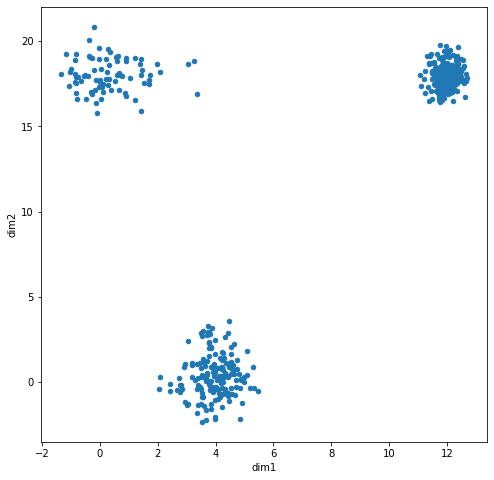

In [18]:
df.plot.scatter(x='dim1', y='dim2', figsize=(8,8))

print('There are 3 obvious clusters on a plot of dim1 vs dim2')

## Question 3 (15 points). Perform principal components analysis (PCA) on the dataset, following along with the example in the lectures10and11 notebook. What fraction of the variation in the dataset is captured by the first two components? Make a plot of the first component against the second component. Now how many clusters do you see in the data? (2 points extra credit if you standardize the data first using `sklearn.preprocessing.StandardScaler`; see the lectures10and11 notebook for an example of how to do that.)

The fraction of the total variance explained by each component is: [0.71764809 0.14764088 0.0660396  0.05248787 0.00817722 0.00235135
 0.00176303 0.00156625 0.00128678 0.00103894]
The first two components capture 71.76480872367671% and 14.764088428622637% of the variation in the dataset, respectively
Based on PC1 vs PC2, there are 5 obvious clusters in the data


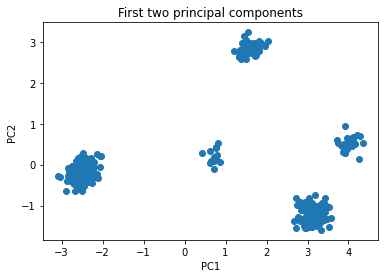

In [31]:
# This chunk of code was adapted from lecture10and11.ipynb (credit Phil Bradley)

# import PCA class, StandardScaler, and numpy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# create the sklearn object and fit it to the data
scaler = StandardScaler()
scaler.fit( df )

# apply the fitted model to transform the data
df_scaled = scaler.transform( df )

# create and configure the model (call it "pca")
pca = PCA(n_components=10)

# 2. fit the model to the data 
pca.fit(df_scaled)

# 3. look at the model's explained_variance_ratio_
print('The fraction of the total variance explained by each component is:', pca.explained_variance_ratio_)
print(f'The first two components capture {pca.explained_variance_ratio_[0]*100}% and {pca.explained_variance_ratio_[1]*100}% of the variation in the dataset, respectively')

# 4. transform the data to a new array
X_pca_scaled = pca.transform(df_scaled)

# 5. Plot the first two components, as we did in class.
plt.scatter(X_pca_scaled[:,0], X_pca_scaled[:,1])
plt.title('First two principal components')
plt.xlabel('PC1')
plt.ylabel('PC2');

print('Based on PC1 vs PC2, there are 5 obvious clusters in the data')



## Question 4 (15 points). Use the KMeans clustering algorithm from scikit-learn to assign each point in the dataset to a cluster. Configure KMeans to find a number of clusters equal to the number that you identified visually in the PCA plot from question 3. What are the sizes of the different clusters (how many points are in each cluster)? Remake the PCA scatter plot (PC1 versus PC2) colored by the cluster labels.

cluster sizes: 0    256
1    128
2     64
3     32
4     16
Name: clusters, dtype: int64


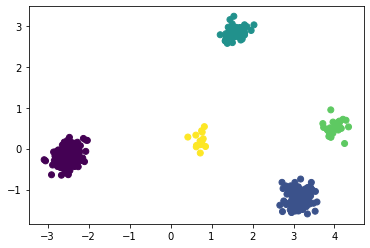

In [51]:
# This chunk of code was adapted from lectures10and11.ipynb (Credit Phil Bradley)
# 
from sklearn.cluster import KMeans

# 1. create a KMeans object, call it kmeans; you'll need to tell it how many clusters to find
kmeans = KMeans(n_clusters=5, random_state=10)

# 2. fit the object to the data using kmeans.fit
kmeans.fit(X_pca_scaled)

# 3. Get the list of clusters using kmeans.predict
#    Name the returned array of cluster assignments "clusters"
clusters = kmeans.predict(X_pca_scaled)

# To get the cluster sizes, first look at the array of clusters returned by kmeans.predict
#    to see that the different values are integers between 0 and nclust-1, inclusive.

# To get the size of each cluster, you could write a for loop over the different cluster
# numbers, and inside the loop you could count how many elements in clusters array are
# equal to that cluster number. Instead, do it by creating a new column in the dataframe 
# containing the cluster assignments, and using the pandas method value_counts:

df['clusters'] = clusters # create a new column in the dataframe with the KMeans cluster assignments

print('cluster sizes:', df['clusters'].value_counts()) # handy built-in counting method for Pandas Series objects

# use this code to remake the PCA plot colored by the kmeans clusters, where "clusters" is the 
#  array returned by the kmeans.predict function  

plt.scatter( X_pca_scaled[:,0], X_pca_scaled[:,1], c=clusters )



## Question 5. (10 points) Make a 'scatter matrix' plot showing each column of the original dataset plotted against each of the other 9 columns in a big 10x10 array (like we did for the iris dataset in the lectures10and11 notebook). Notice how the number of apparent clusters in the data varies depends on which pairs of features are being plotted against one another. Color the plots using the kmeans clusters like you did in the previous question.
You could use `pd.plotting.scatter_matrix` or try importing seaborn (`import seaborn as sns`) and use `sns.pairplot`. Or (optional) try both and see which looks nicer. `sns.pairplot` has a `hue` argument that you can use for coloring by passing `hue='clusters'`. See the `pd.plotting.scatter_matrix` and `sns.pairplot` examples in the lectures10and11.ipynb jupyter notebook.

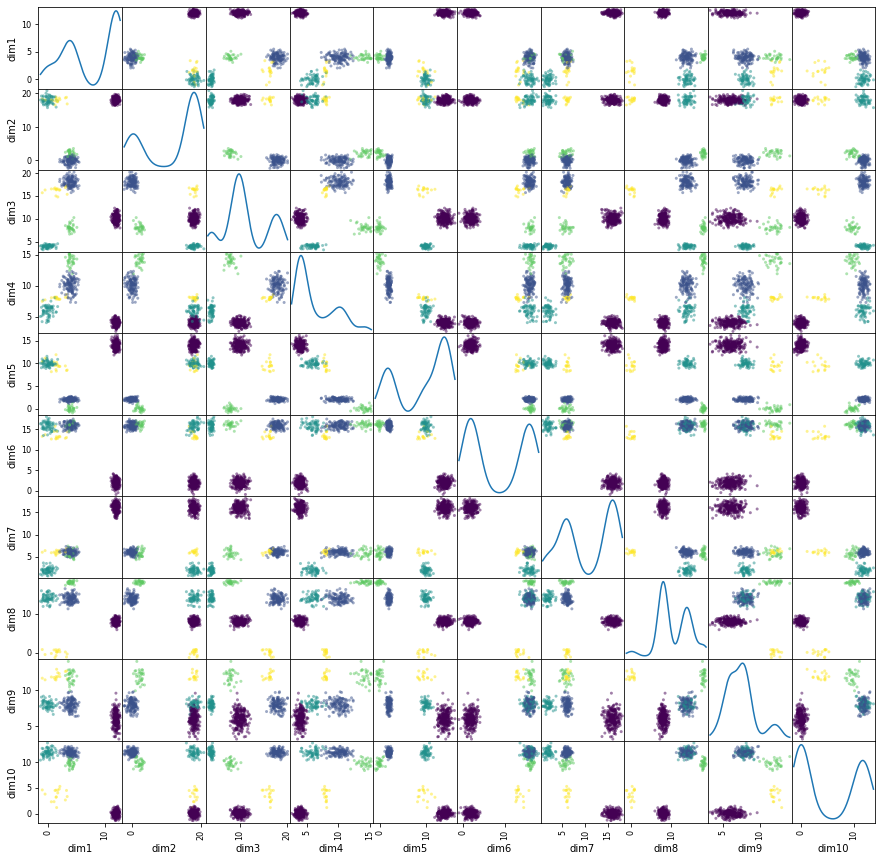

In [47]:
# Code adapted from lectures10and11.ipynb, Phil Bradley.
# I drop the clusters column from the df so that this isn't plotted against all of the dimensions
pd.plotting.scatter_matrix(df.drop(columns=['clusters']), diagonal='kde', figsize=(15,15), c=df['clusters']);

## Question 5. (5 points of extra credit) Use the TSNE algorithm in scikit-learn to project the dataset down into 2 dimensions. How many clusters do you see in the TSNE scatter plot?

There are 5 clusters on the TSNE scatter plot


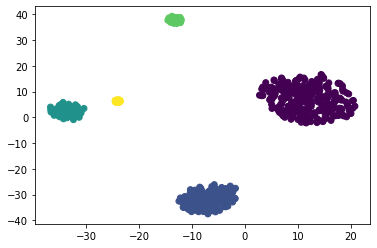

In [53]:
from sklearn.manifold import TSNE

# 1. create the TSNE object, call it tsne. Tell it you want 2 components (ie, a 2D projection) 
tsne = TSNE(n_components=2, random_state=10)

# 2. Fit the data to the model and transform to a new array (call it X_tsne) using tsne.fit_transform
#     This combines the fit and transform steps into a single operation.
X_tsne = tsne.fit_transform(df)

# Use this matplotlib command to make a scatter plot of the two components, colored by the 
#  kmeans cluster assignments

# this line of code was provided in the hw (Credit Phil Bradley)
plt.scatter( X_tsne[:,0], X_tsne[:,1], c=clusters )

print('There are 5 clusters on the TSNE scatter plot')
